# 안내

본 실습자료는, 여러분들이 공공데이터포털과 같은 open data repository로부터 다변량 데이터를 직접 다운로드 받아서, MANOVA, PCA, FA 기술을 적용해볼 수 있는 자료입니다.

* **Goal**: 실제 다변량 데이터에 MANOVA, PCA, FA 적용해보기.
* **공공데이터 예시**:
  *  UC Irvine Data Repository ()
  *  sklearn toy datasets (https://scikit-learn.org/stable/datasets/toy_dataset.html)

* **조건**:
  1. 다변량 데이터 활용 (MANOVA, PCA, FA 모두 동일한 데이터로 분석할 필요는 없음. 즉, 모두 다른 데이터셋을 활용해도 됨.)
  2. 기한: **2024년 6월 19일 오후 6시**
  3. 제출처: e-class
  4. 제출파일: 이름_analysis.ipynb 및 1-page report
  5. 리포트 필수 포함 내용 (제한 분량: 1 page)

    a) 데이터셋의 선정 이유 및 다변량 모델이 필요한 이유
    
    b) 적합한 모델의 선정
    
    c) (예측)결과에 대한 고찰
  
  6. python notebook (.ipynb) 필수 포함 내용

    a) 각 cell의 code 및 output  



# **1. Python 실습 (MANOVA)**



In [1]:
# Library 불러오기
!pip install factor_analyzer
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

import matplotlib as mpl
print(mpl.get_cachedir())
mpl.rc('font', family='Malgun Gothic')

import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\jangj\.matplotlib


In [2]:
# wine 데이터셋 불러오기
from sklearn.datasets import load_wine
data = load_wine()
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['wine'] = data.target
df_wine.columns = [
    'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
    'color_intensity', 'hue', 'od280_od315_of_diluted_wines', 'proline', 'wine'
]

# 데이터셋의 처음 몇 줄을 표시
df_wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280_od315_of_diluted_wines  proline  wine  
0                          3.92   1065.0     0  
1                          3.40   1050.0     0  
2                          3.17   1185.0     0  
3                          3.45   1480.0     0  
4                          2.93    735.0     0

In [3]:
# MANOVA 수행

# intercept: 절편의 유의미성
# target: 와인에 따른 차이의 유의미성
formula = ' + '.join(df_wine.columns[:-1]) + ' ~ wine'
maov_wine = MANOVA.from_formula(formula, data=df_wine)
print(maov_wine.mv_test())


                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value    Num DF  Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0028 13.0000 164.0000 4488.7189 0.0000
         Pillai's trace   0.9972 13.0000 164.0000 4488.7189 0.0000
 Hotelling-Lawley trace 355.8131 13.0000 164.0000 4488.7189 0.0000
    Roy's greatest root 355.8131 13.0000 164.0000 4488.7189 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
             wine          Value   Num DF  Den DF  F Value  Pr > F
------------------------------------------------------------------
             Wilks' lambda 0.0999 13.0000 164.0000 113.6507 0.0000
            Pill

1. Wilks' Lambda: 
- 값이 작을수록 독립 변수가 종속 변수에 미치는 영향이 크다는 것을 나타냄. 
- 여기서 값이 0.0999으로 작으며, 이는 유의미한 차이를 나타냄.

2. Pillai's Trace: 
- 값이 클수록 유의미한 차이가 있다는 것을 나타냄. 
- 여기서 값이 0.9001로 매우 큼.

3. Hotelling-Lawley Trace: 
- 값이 클수록 유의미한 차이가 있다는 것을 나타냄. 
- 여기서 값이 9.0089으로 매우 큼.

4. Roy's Greatest Root: 
- 가장 큰 고유값을 기준으로 하며, 값이 클수록 유의미한 차이가 있다는 것을 나타냄. 
- 여기서 값이 9.0089으로 매우 큼.

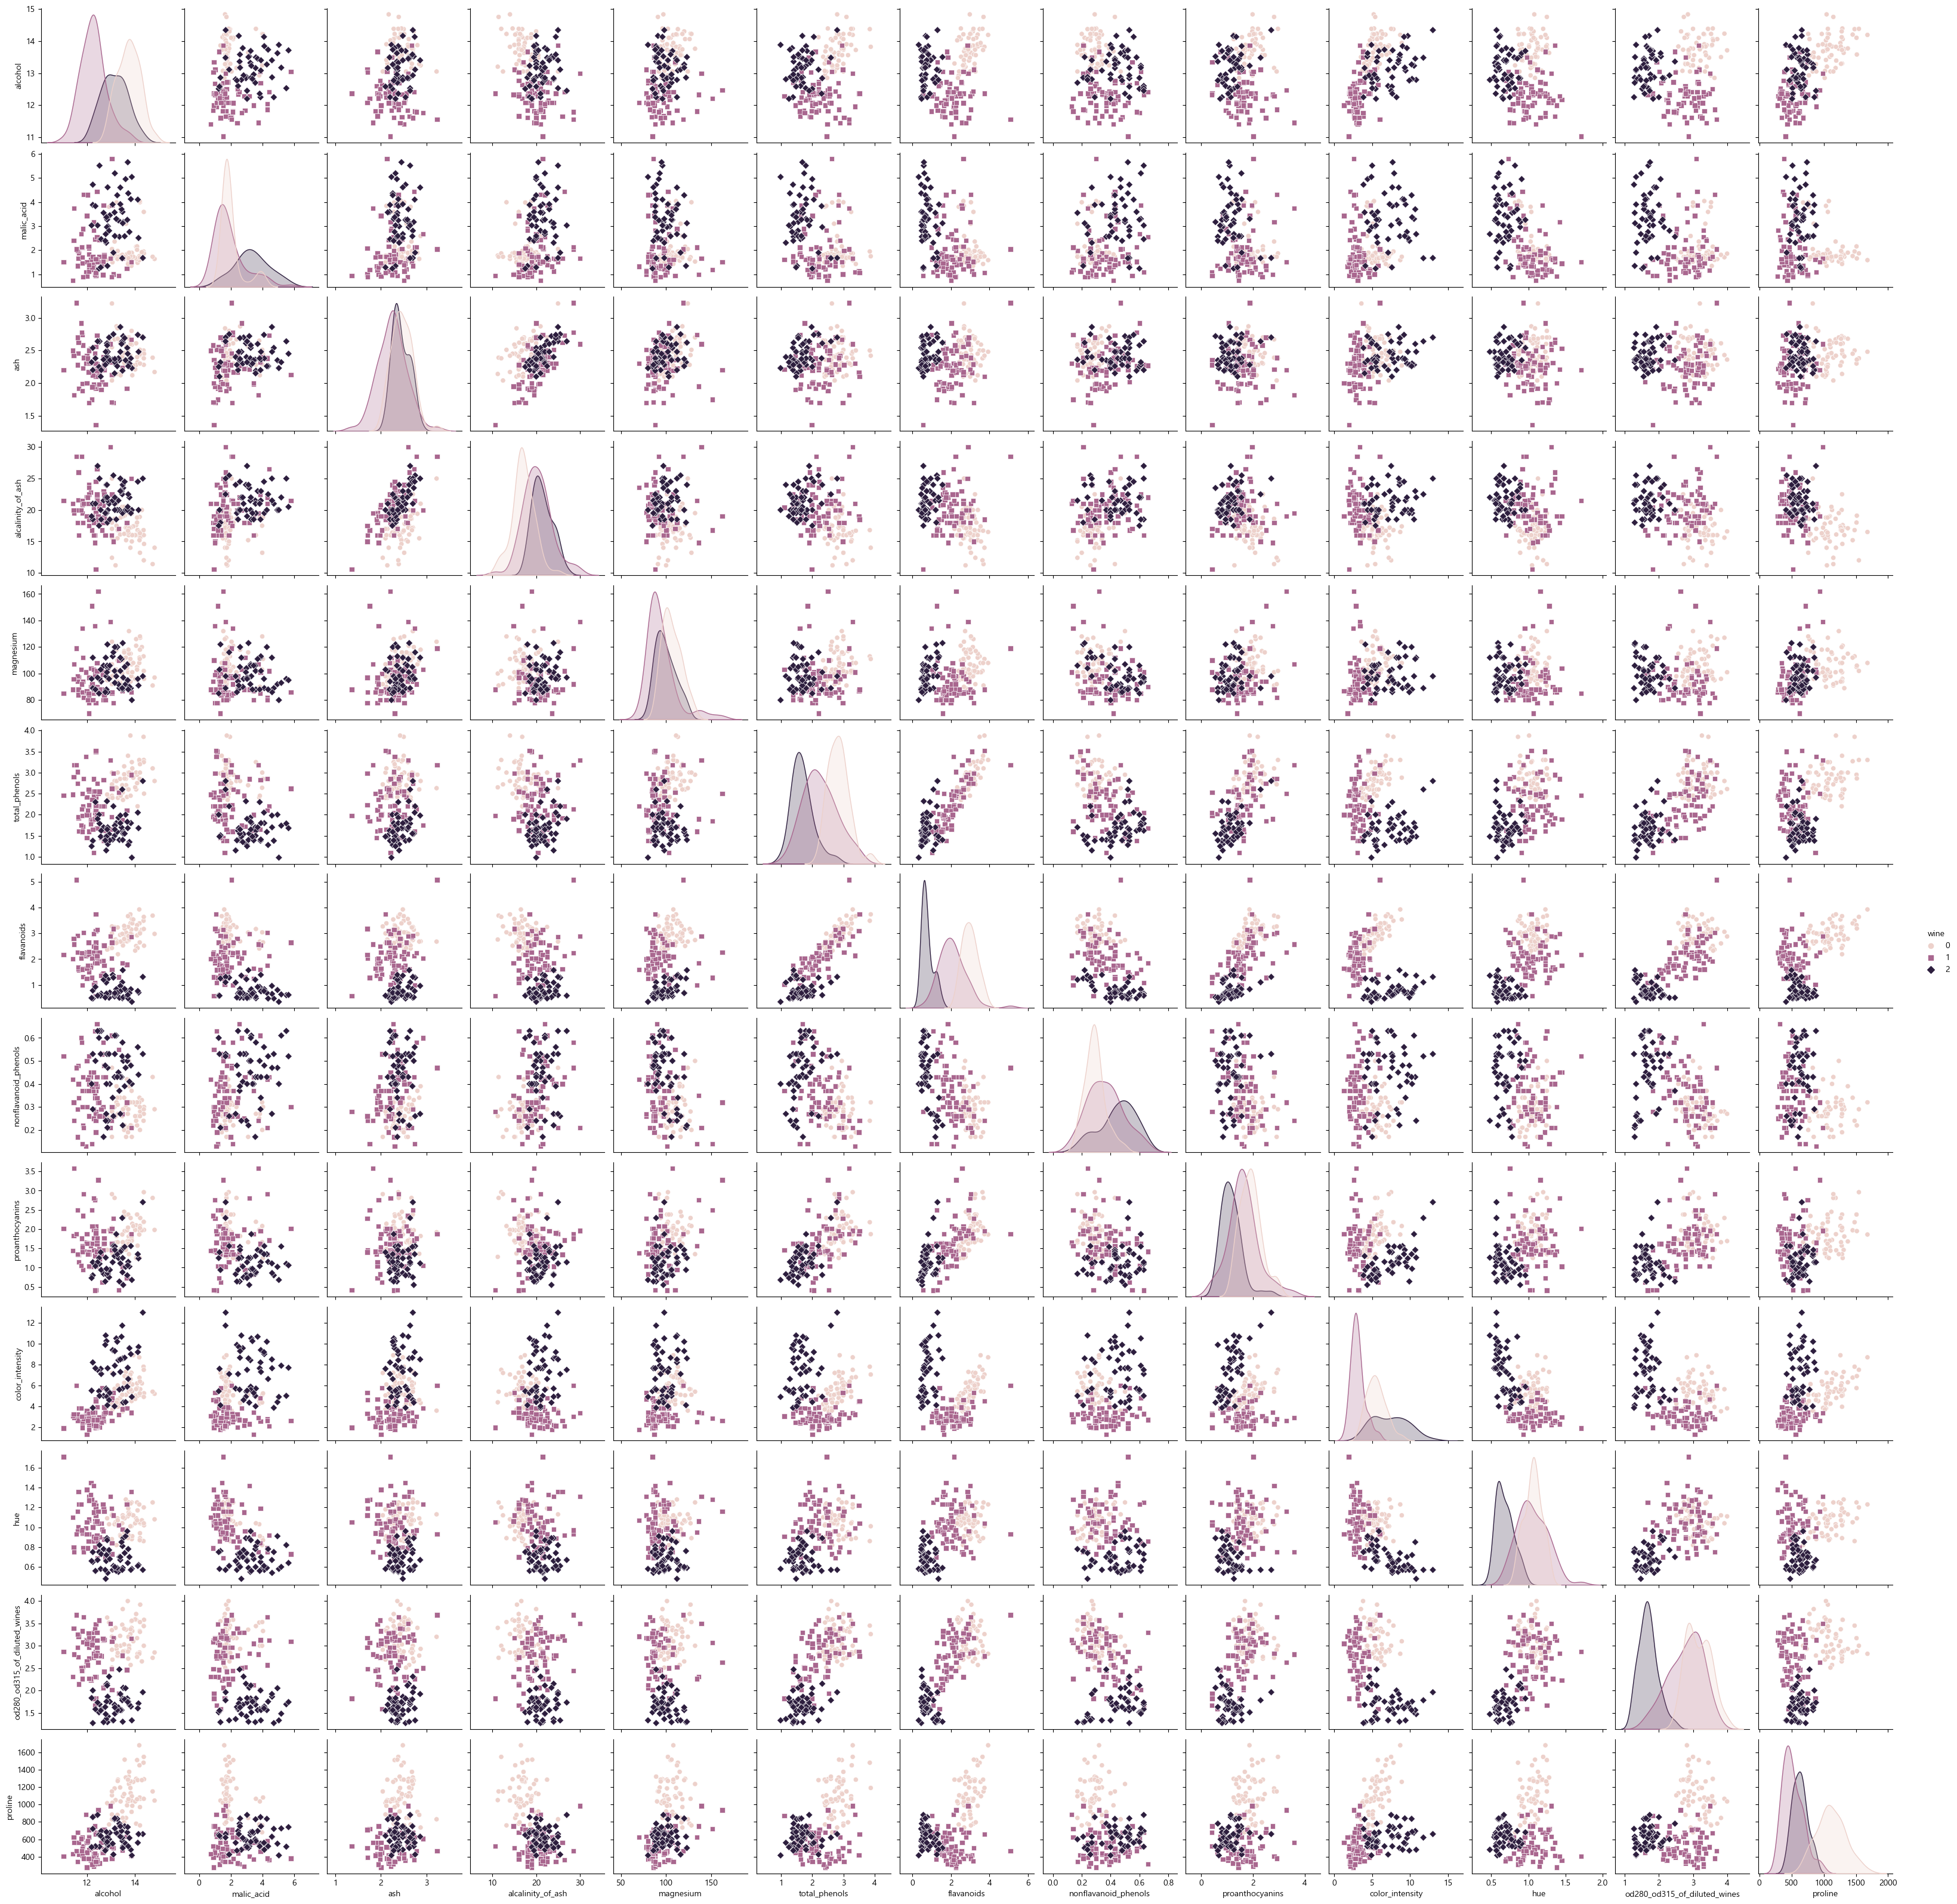

In [4]:
# 데이터셋의 pairplot
sns.pairplot(df_wine, hue='wine', markers=["o", "s", "D"])
plt.show()

### MANOVA 해석
- 다변량 테스트 결과(Wilks’ Lambda, Pillai’s Trace, Hotelling-Lawley Trace, Roy’s Greatest Root)를 확인
- p-값을 해석하여 결합된 종속 변수 간에 유의미한 차이가 있는지 확인


- 결론: 이 MANOVA 분석 결과는 와인(wine)과 절편이 다변량 종속 변수에 대해 매우 유의미한 영향을 미친다는 것을 보여준다. 이 모든 테스트의 p-값이 0.0000으로 나타나 유의 수준 0.05보다 훨씬 낮기 때문에, 귀무 가설(즉, 와인의 종류와 절편이 다변량 종속 변수에 영향을 미치지 않는다는 가설)을 기각할 수 있다. 이는 와인 변수 (와인 종류)와 절편이 다변량 종속 변수들에 실제로 유의미한 영향을 미친다는 강력한 증거이다.

# **2. PCA (주성분 분석)**
### 이론
PCA는 차원 축소 기법으로, 데이터의 차원을 줄이면서도 정보 손실을 최소화

### 실습 예제
breast cancer 데이터셋을 사용하여 PCA를 수행

In [5]:
# breast cancer 데이터셋 불러오기
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df_breast_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_breast_cancer['breast_cancer'] = data.target

# 데이터셋의 처음 몇 줄을 표시
df_breast_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  breast_cancer  
0          0.4601                  0.11890              0  
1          0.2750                  0.08902              0  
2          0.3613                  0.08758              0  
3          0.6638                  0.17300              0  
4          0.2364                  0.07678              0  

[5 rows x 31 columns]

In [6]:
# 데이터 표준화
features = data.data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA 수행
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['breast_cancer'] = df_breast_cancer['breast_cancer']

# 설명된 분산 비율 표시
explained_variance = pca.explained_variance_ratio_
print(f"각 주성분에 의해 설명된 분산: {explained_variance}")


각 주성분에 의해 설명된 분산: [0.44272026 0.18971182]


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


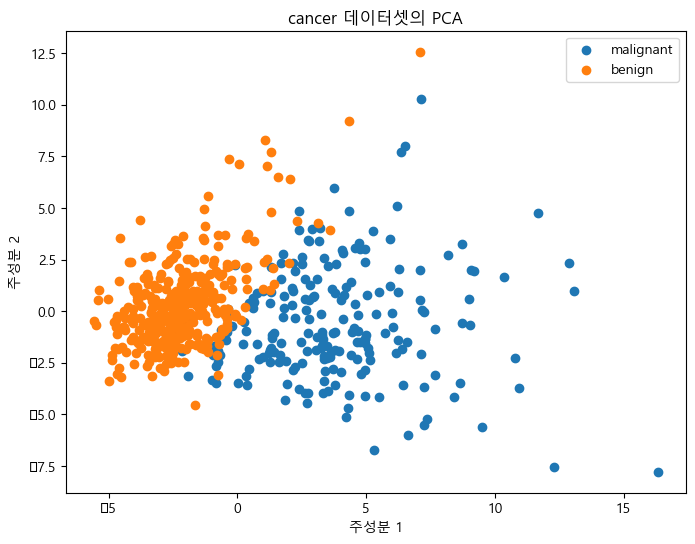

In [7]:
# PCA 결과 시각화
plt.figure(figsize=(8,6))
for breast_cancer in np.unique(df_breast_cancer['breast_cancer']):
    plt.scatter(pc_df[pc_df['breast_cancer'] == breast_cancer]['PC1'], 
                pc_df[pc_df['breast_cancer'] == breast_cancer]['PC2'], 
                label=data.target_names[breast_cancer])
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.legend()
plt.title('cancer 데이터셋의 PCA')
plt.show()


### PCA 해석
- 설명된 분산을 확인하여 얼마나 많은 정보가 유지되는지 이해
- 주성분 공간에서 그룹의 분리를 시각화

### PCA for Visualization

In [8]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [9]:
breast_cancer = load_breast_cancer()
breast_cancer.data.shape

(569, 30)

In [10]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(breast_cancer.data)
print(breast_cancer.data.shape)
print(projected.shape)

(569, 30)
(569, 2)


C:\Users\jangj\AppData\Local\Temp\ipykernel_17580\4070663930.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('rainbow', 2))
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


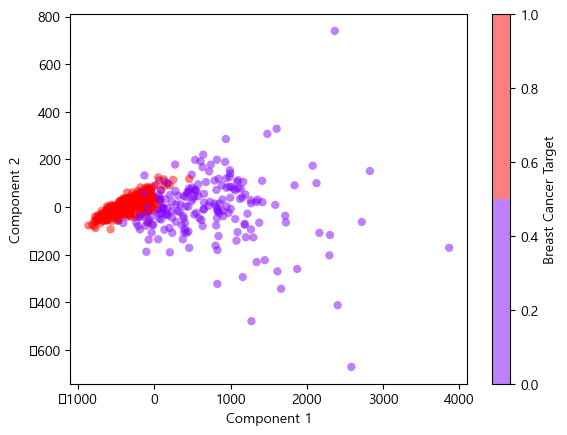

In [11]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=breast_cancer.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 2))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Breast Cancer Target')
plt.show()

- 전체 데이터는 30차원의 데이터 클라우드
- 각 데이터 점은 가장 큰 분산 방향으로 투영됨.
- 30차원 공간에서 데이터를 2차원에서 볼 수 있도록 최적의 스트레치와 회전
- 이는 라벨을 참조하지 않고 비지도 학습 방식으로 수행됨.

### 주성분 수의 선택
- PCA를 사용할 때 중요한 부분은 데이터를 설명하는 데 필요한 성분 수를 추정하는 것임. 
- 이는 성분 수에 따른 누적 설명 분산 비율을 확인함으로써 결정함.

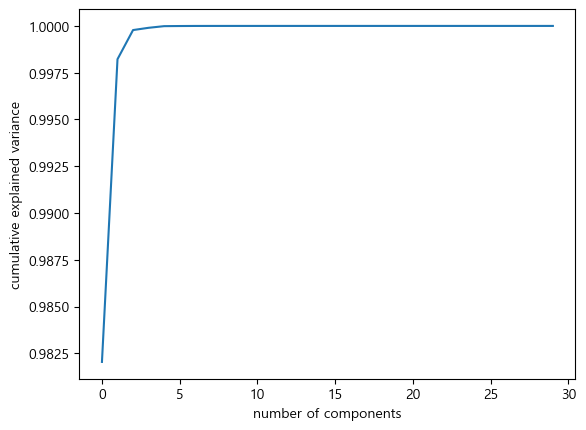

In [12]:
pca = PCA().fit(breast_cancer.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# **3. PCA (주성분 분석)**
### PCA as noise filtering
- PCA는 노이즈가 많은 데이터에 대해 필터링 기법으로도 사용할 수 있음.
- 아이디어: 노이즈의 영향보다 훨씬 큰 분산을 가진 성분은 노이즈에 상대적으로 영향을 받지 않는다. 따라서 가장 큰 주성분 집합만 사용하여 데이터를 재구성하면 신호는 유지하고 노이즈는 제거할 수 있다.

### 실습 예제
- Shoulder Implant X-Ray Manufacturer Classification 데이터

In [13]:
import zipfile
import os
from PIL import Image

# 압축 파일 경로
zip_file_path = 'shoulder+implant+x+ray+manufacturer+classification.zip'
extract_dir = 'extracted_images'

# 압축 해제 디렉토리가 이미 존재하면 삭제
if os.path.exists(extract_dir):
    import shutil
    shutil.rmtree(extract_dir)

# 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    
# 데이터 폴더 경로
data_folder = os.path.join(extract_dir, 'data')

In [14]:
def load_images_from_folder(folder, image_size=(64, 64)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            with Image.open(img_path) as img:
                img_resized = img.resize(image_size)
                img_gray = img_resized.convert('L')  # 회색조 변환
                images.append(np.array(img_gray))
        except Exception as e:
            print(f"Could not load image {img_path}: {e}")
    return np.array(images)

# 이미지 불러오기
images = load_images_from_folder(data_folder)

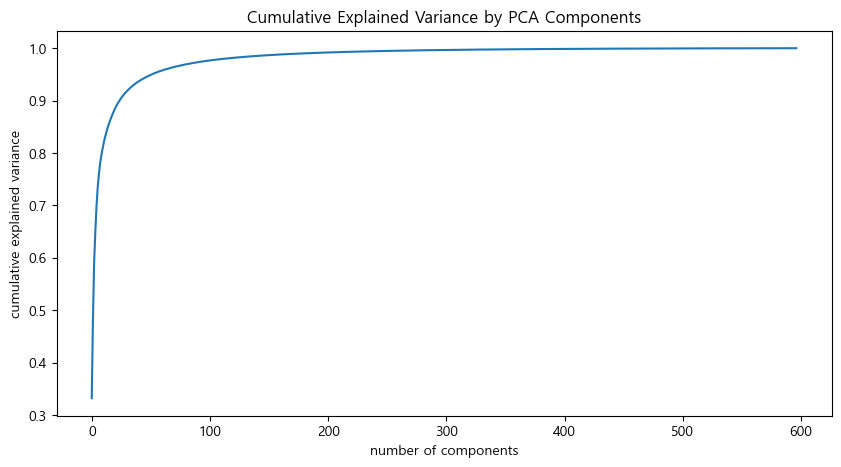

In [15]:
pca = PCA().fit(images.reshape(images.shape[0], -1))
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.show()

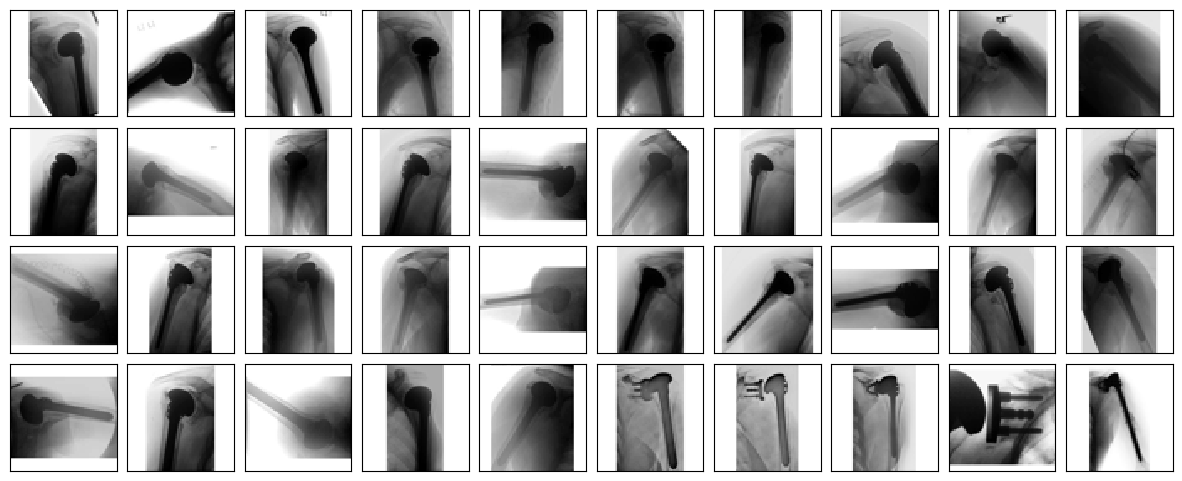

In [16]:
# 이미지 시각화 함수
def plot_digits(data, image_shape=(64, 64), cmap='binary'):
    fig, axes = plt.subplots(4, 10, figsize=(15, 6),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        if i < len(data):
            ax.imshow(data[i].reshape(image_shape),
                      cmap=cmap, interpolation='nearest')
    plt.show()

# 원본 이미지 시각화
plot_digits(images)

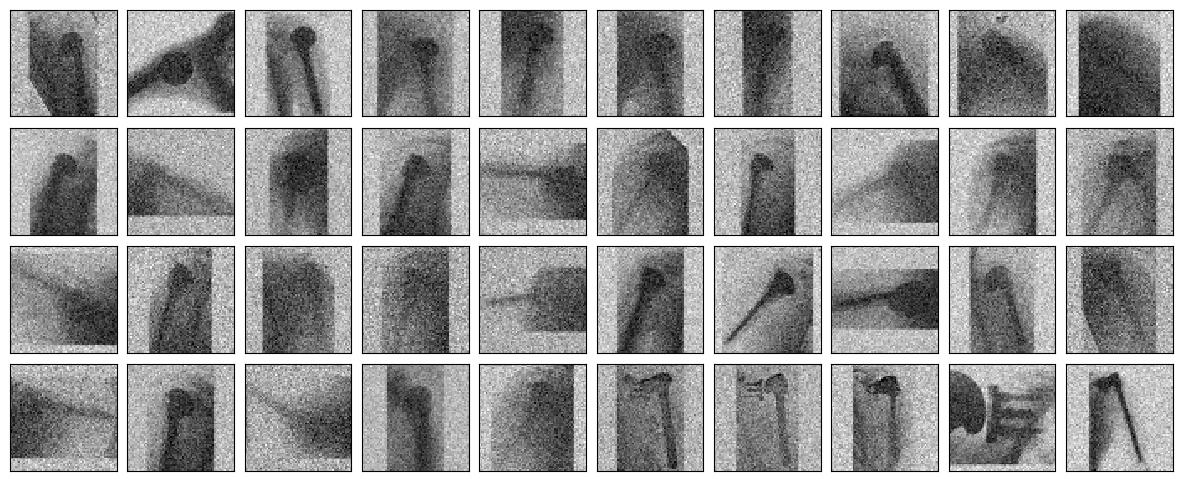

In [29]:
# 노이즈 추가
rng = np.random.default_rng(42)
noisy_images = rng.normal(images, 30)
plot_digits(noisy_images)

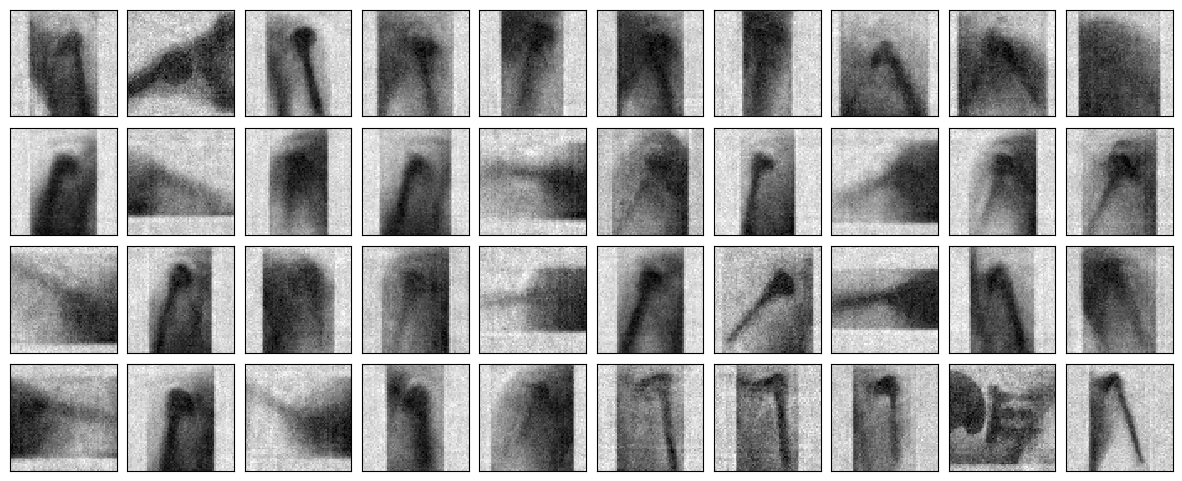

In [31]:
pca_100 = PCA(100).fit(noisy_images.reshape(noisy_images.shape[0], -1))
components_100 = pca_100.transform(noisy_images.reshape(noisy_images.shape[0], -1))
filtered_images_100 = pca_100.inverse_transform(components_100)
plot_digits(filtered_images_100.reshape(filtered_images_100.shape[0], 64, 64))

# **4. 요인 분석**
### 이론
요인 분석은 변수들 간의 잠재적 관계를 식별하는 데 사용된다. 관측된 변수의 수를 줄여 더 적은 수의 요인으로 만든다.

### 실습 예제
Wholesale customers

이 데이터셋은 도매 유통업체의 고객들을 대상으로 한 것으로, 다양한 제품 카테고리에 대한 연간 지출 금액을 포함하고 있다.

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('Wholesale customers data.csv')

# 데이터 확인
print(df.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [20]:
# 결측치 처리
df = df.dropna()

# 카테고리형 변수(Channel) 및 종속변수(Region) 제거
df = df.drop(columns=['Channel', 'Region'])

# 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [21]:
# 요인 분석 모델 생성
fa = FactorAnalysis(n_components=3)  # 3개의 요인을 추출한다고 가정
fa.fit(df_scaled)

# 요인 적재치 출력
print(pd.DataFrame(fa.components_, columns=df.columns))


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0 -0.044974  0.734425  0.969736 -0.068939          0.959762    0.175613
1  0.461745  0.338930  0.048569  0.551631         -0.125296    0.787506
2 -0.510586  0.047512 -0.016125 -0.166558         -0.000765    0.213470


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


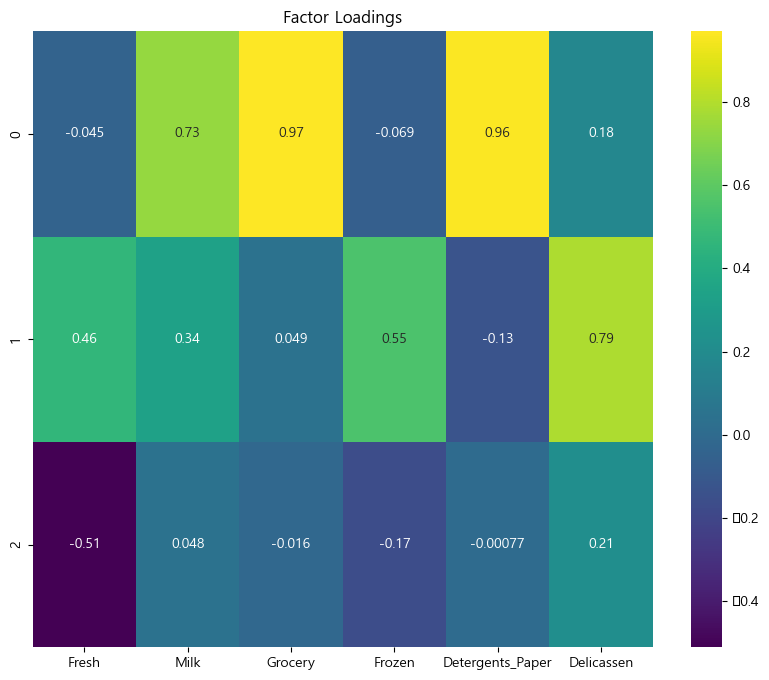

In [22]:
# 상관 행렬 시각화
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(fa.components_, columns=df.columns), annot=True, cmap='viridis')
plt.title('Factor Loadings')
plt.show()


### 요인 분석 해석
1. 요인의 의미

- 요인 분석을 통해 발견된 각 요인은 여러 관찰된 변수들에 의해 설명된다. 
- 각 요인이 어떤 의미를 가지는지 해석하기 위해 각 요인에 크게 적재된 변수들을 살펴보아야 한다.

2. 요인 적재치 (Factor Loadings)

- 요인 적재치는 각 변수와 요인 사이의 상관관계를 나타낸다. 
- 높은 적재치를 가진 변수들은 그 요인에 더 큰 기여. 일반적으로 절대값이 0.4 이상인 적재치를 중요한 것으로 간주한다.

3. 요인 회전 (Factor Rotation)

- 요인 회전은 요인 적재치를 더 명확하게 해석하기 위해 사용된다.
- Varimax 회전과 같은 직교 회전은 요인 해석을 더 쉽게 만들어 줌.

4. 공통성 (Communalities)

- 공통성은 각 변수의 분산 중에서 요인들에 의해 설명되는 부분을 나타낸다. 
- 높은 공통성은 해당 변수가 요인 구조에 잘 맞는다는 것을 의미한다.

In [23]:
# 요인 적재치 출력
fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)
loadings = pd.DataFrame(fa.components_, columns=df.columns)
print(loadings)


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0 -0.044974  0.734425  0.969736 -0.068939          0.959762    0.175613
1  0.461745  0.338930  0.048569  0.551631         -0.125296    0.787506
2 -0.510586  0.047512 -0.016125 -0.166558         -0.000765    0.213470


1. 요인 0: 요인 0은 유제품(Milk), 식료품(Grocery), 그리고 세제 및 종이 제품(Detergents_Paper)에 대한 소비와 강한 관련이 있다.
- 이 요인은 고객들의 일상 소비품 지출과 관련이 있을 수 있다.
- 예를 들어, 슈퍼마켓이나 일반 가정에서 많이 구매하는 제품들에 대한 지출 패턴을 반영할 수 있다.

2. 요인 1: 요인 1은 냉동 식품(Frozen), 조제 식품(Delicassen)에 대한 소비와 강한 관련이 있다.
- 이 요인은 고객들의 특별 식품 지출과 관련이 있을 수 있다.
- 예를 들어, 고급 레스토랑이나 특수 요리 재료를 많이 구매하는 고객들의 지출 패턴을 반영할 수 있다.

3. 요인 2: 요인 2는 신선 식품(Fresh)와 조제 식품(Delicassen)에 대한 소비와 어느 정도 관련이 있다.
- 이 요인은 특정한 신선 식품과 조제 식품에 대한 고객들의 지출 패턴을 반영할 수 있다.
- 예를 들어, 신선한 과일과 채소 또는 고급 조제 식품을 선호하는 고객들의 소비 패턴을 나타낼 수 있다.

### 요인 회전 (Factor Rotation)

- Varimax 회전은 요인 적재치를 더 쉽게 해석할 수 있도록 하는 직교 회전 방법 중 하나임. 
- Varimax 회전을 적용하면 요인 적재치가 더 명확하게 구분되어 각 요인이 어떤 변수들과 관련이 있는지 더 잘 이해할 수 있음.


In [24]:
# 요인 분석 수행
fa = FactorAnalyzer(n_factors=3, rotation=None)
fa.fit(df_scaled)

# Varimax 회전 적용
fa_rotated = FactorAnalyzer(n_factors=3, rotation='varimax')
fa_rotated.fit(df_scaled)

# 요인 적재치 출력
loadings = fa_rotated.loadings_
print("Varimax 회전 후 요인 적재치:")
print(pd.DataFrame(loadings, index=df.columns))


Varimax 회전 후 요인 적재치:
                         0         1         2
Fresh            -0.010803  0.196582  0.828284
Milk              0.733623  0.337016  0.050928
Grocery           0.971050  0.049350 -0.013359
Frozen           -0.060104  0.451984  0.309531
Detergents_Paper  0.956372 -0.105157 -0.085658
Delicassen        0.171548  0.816660  0.103833


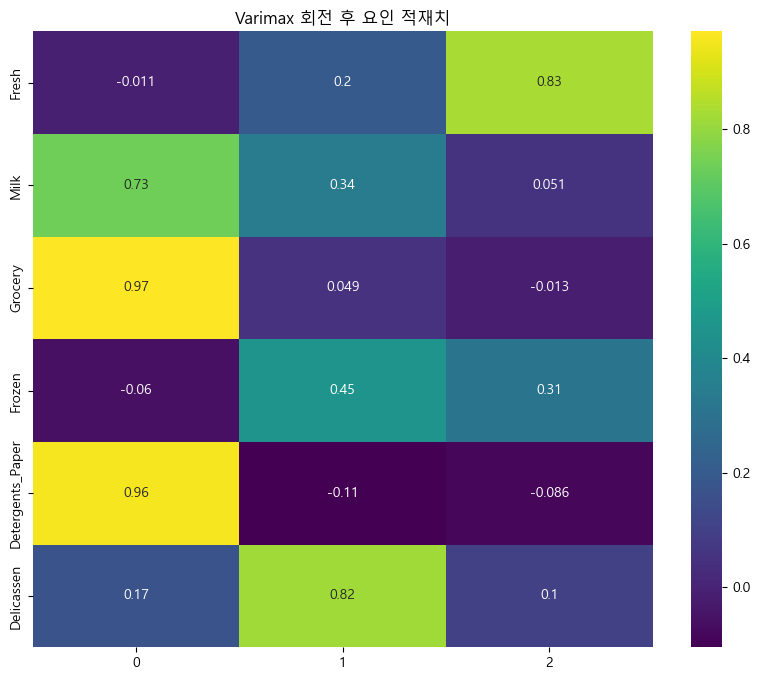

In [25]:
# 요인 적재치 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(loadings, index=df.columns), annot=True, cmap='viridis')
plt.title('Varimax 회전 후 요인 적재치')
plt.show()


### 공통성(Communalities)
- 공통성(Communalities)은 각 변수의 분산 중에서 요인들에 의해 설명되는 부분
- 공통성이 높을수록 해당 변수가 요인 구조에 잘 맞는다는 것을 의미

In [26]:
# 요인 분석 수행
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df_scaled)

# 요인 적재치 출력
loadings = fa.loadings_
print("Varimax 회전 후 요인 적재치:")
print(pd.DataFrame(loadings, index=df.columns))


Varimax 회전 후 요인 적재치:
                         0         1         2
Fresh            -0.010803  0.196582  0.828284
Milk              0.733623  0.337016  0.050928
Grocery           0.971050  0.049350 -0.013359
Frozen           -0.060104  0.451984  0.309531
Detergents_Paper  0.956372 -0.105157 -0.085658
Delicassen        0.171548  0.816660  0.103833


In [27]:
# 공통성 계산
communalities = fa.get_communalities()
print("공통성:")
print(pd.DataFrame(communalities, index=df.columns, columns=["공통성"]))


공통성:
                       공통성
Fresh             0.724815
Milk              0.654376
Grocery           0.945551
Frozen            0.303711
Detergents_Paper  0.933043
Delicassen        0.707143


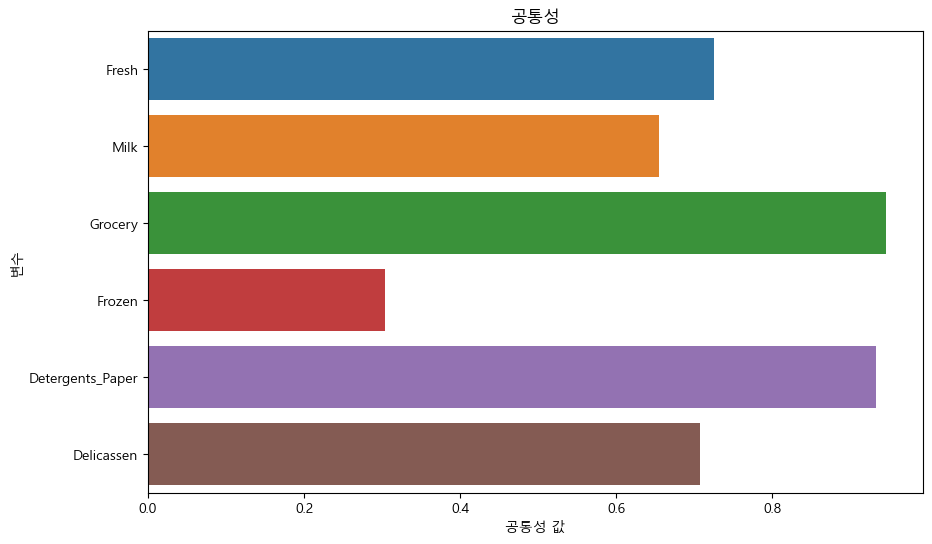

In [28]:
# 공통성 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=communalities, y=df.columns, orient='h')
plt.title('공통성')
plt.xlabel('공통성 값')
plt.ylabel('변수')
plt.show()
